In [ ]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys

main_dir='drive/MyDrive/SER/'

#data = pd.read_csv(main_dir+'../ravdes/featureEmodb_Ek.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,gender,emo
0,-291.023743,122.103310,-44.846886,59.766186,-24.904373,23.310034,-18.901543,-4.398162,-2.784216,-9.171474,...,16.934180,44.290817,0.010006,0.012283,-0.032002,0.024771,0.008110,0.001527,0,6
1,-275.305420,138.871933,-33.697144,49.522625,-7.244414,14.749916,-5.809273,-8.138051,-7.884721,-2.113137,...,19.170462,42.127514,-0.001838,0.006182,-0.084598,0.109258,-0.025841,-0.003582,0,3
2,-226.691788,95.119919,-73.665314,41.528965,-27.266602,11.262508,-13.882312,-9.181475,-10.468313,-10.647150,...,19.369836,43.109701,0.000832,-0.006184,-0.034412,-0.076670,0.011311,-0.001623,0,1
3,-274.819733,100.031342,-37.423729,36.635162,-22.137280,17.577888,-11.324630,-2.312308,-11.398092,-17.833254,...,17.451906,46.304244,0.039056,-0.017722,-0.080997,-0.049779,0.015512,-0.007105,0,6
4,-253.606750,150.312592,-25.341574,45.506142,-0.686996,5.291062,1.370816,-1.645677,-12.028738,-10.254305,...,19.763224,39.307039,0.004677,-0.009056,-0.025911,-0.049394,0.005211,0.028331,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-256.870941,106.805382,-42.942406,76.135025,-23.356741,9.561186,-15.960503,-6.739610,-2.011499,-10.854325,...,19.849010,44.480497,0.013730,-0.044924,0.036141,-0.103874,0.014027,0.004247,1,2
531,-247.077347,92.381683,-25.850836,57.561165,-6.191659,18.602076,-3.402066,-4.480618,3.263244,-6.546418,...,18.877839,45.172986,0.022582,0.051643,0.111258,0.034694,0.032592,-0.023957,1,7
532,-288.360962,89.563797,-22.478836,60.567955,-0.328118,19.141325,0.582287,1.187719,4.120030,-6.690523,...,17.697322,45.060143,0.064397,0.045831,-0.014433,0.036813,-0.002724,-0.039336,1,7
533,-330.462524,68.713730,-88.104507,64.599174,-49.094189,-2.239225,-19.608362,-12.148569,-5.809820,-29.100821,...,21.775347,42.181517,0.004429,0.004515,-0.046787,-0.008189,-0.011627,0.014819,1,1


In [ ]:
data.shape

(535, 195)

In [ ]:
#df=data.loc[data.iloc[:,-2] == 1] #female
df=data.loc[data.iloc[:,-2] == 0] #male

In [ ]:
data.iloc[:,-2] == 0 #male

0       True
1       True
2       True
3       True
4       True
       ...  
530    False
531    False
532    False
533    False
534    False
Name: gender, Length: 535, dtype: bool

In [ ]:
X=df.iloc[:,:-2].copy()
y=df.iloc[:,-1].copy()

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-291.023743,122.103310,-44.846886,59.766186,-24.904373,23.310034,-18.901543,-4.398162,-2.784216,-9.171474,...,14.751550,17.491031,16.934180,44.290817,0.010006,0.012283,-0.032002,0.024771,0.008110,0.001527
1,-275.305420,138.871933,-33.697144,49.522625,-7.244414,14.749916,-5.809273,-8.138051,-7.884721,-2.113137,...,14.512857,17.552152,19.170462,42.127514,-0.001838,0.006182,-0.084598,0.109258,-0.025841,-0.003582
2,-226.691788,95.119919,-73.665314,41.528965,-27.266602,11.262508,-13.882312,-9.181475,-10.468313,-10.647150,...,16.132340,18.235059,19.369836,43.109701,0.000832,-0.006184,-0.034412,-0.076670,0.011311,-0.001623
3,-274.819733,100.031342,-37.423729,36.635162,-22.137280,17.577888,-11.324630,-2.312308,-11.398092,-17.833254,...,15.813201,17.616387,17.451906,46.304244,0.039056,-0.017722,-0.080997,-0.049779,0.015512,-0.007105
4,-253.606750,150.312592,-25.341574,45.506142,-0.686996,5.291062,1.370816,-1.645677,-12.028738,-10.254305,...,14.599663,14.796250,19.763224,39.307039,0.004677,-0.009056,-0.025911,-0.049394,0.005211,0.028331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,-226.296951,108.552979,-55.042446,61.870583,-17.076317,20.108128,-23.812933,-1.744954,-9.154915,-17.512157,...,15.537093,17.508004,18.555740,47.328227,-0.051982,-0.003188,-0.015723,-0.099586,-0.004455,-0.001885
460,-223.726562,142.126419,-23.658417,74.999794,-1.674522,24.721136,-1.589465,5.964629,-3.022520,-10.816320,...,14.435953,16.691426,19.445059,43.683436,-0.009760,0.033589,0.096723,-0.038897,-0.009859,0.013775
461,-227.786270,143.321594,-29.231825,80.789589,1.789295,22.493521,1.423745,7.711156,-0.184822,-8.783198,...,14.510513,16.331915,19.743595,43.209543,0.053527,0.008383,-0.029055,0.005702,-0.001841,0.008897
462,-231.731110,145.522858,-34.386009,81.953262,2.942974,18.336418,-0.078413,0.483115,-4.772906,-9.043097,...,14.435760,15.999312,21.259538,42.438650,0.011518,0.028154,0.043445,-0.076132,-0.029849,-0.009460


In [ ]:
#y=y-1
y

0      6
1      3
2      1
3      6
4      3
      ..
459    5
460    2
461    3
462    3
463    1
Name: emo, Length: 233, dtype: int64

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-291.023743,122.103310,-44.846886,59.766186,-24.904373,23.310034,-18.901543,-4.398162,-2.784216,-9.171474,...,14.751550,17.491031,16.934180,44.290817,0.010006,0.012283,-0.032002,0.024771,0.008110,0.001527
1,-275.305420,138.871933,-33.697144,49.522625,-7.244414,14.749916,-5.809273,-8.138051,-7.884721,-2.113137,...,14.512857,17.552152,19.170462,42.127514,-0.001838,0.006182,-0.084598,0.109258,-0.025841,-0.003582
2,-226.691788,95.119919,-73.665314,41.528965,-27.266602,11.262508,-13.882312,-9.181475,-10.468313,-10.647150,...,16.132340,18.235059,19.369836,43.109701,0.000832,-0.006184,-0.034412,-0.076670,0.011311,-0.001623
3,-274.819733,100.031342,-37.423729,36.635162,-22.137280,17.577888,-11.324630,-2.312308,-11.398092,-17.833254,...,15.813201,17.616387,17.451906,46.304244,0.039056,-0.017722,-0.080997,-0.049779,0.015512,-0.007105
4,-253.606750,150.312592,-25.341574,45.506142,-0.686996,5.291062,1.370816,-1.645677,-12.028738,-10.254305,...,14.599663,14.796250,19.763224,39.307039,0.004677,-0.009056,-0.025911,-0.049394,0.005211,0.028331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,-226.296951,108.552979,-55.042446,61.870583,-17.076317,20.108128,-23.812933,-1.744954,-9.154915,-17.512157,...,15.537093,17.508004,18.555740,47.328227,-0.051982,-0.003188,-0.015723,-0.099586,-0.004455,-0.001885
460,-223.726562,142.126419,-23.658417,74.999794,-1.674522,24.721136,-1.589465,5.964629,-3.022520,-10.816320,...,14.435953,16.691426,19.445059,43.683436,-0.009760,0.033589,0.096723,-0.038897,-0.009859,0.013775
461,-227.786270,143.321594,-29.231825,80.789589,1.789295,22.493521,1.423745,7.711156,-0.184822,-8.783198,...,14.510513,16.331915,19.743595,43.209543,0.053527,0.008383,-0.029055,0.005702,-0.001841,0.008897
462,-231.731110,145.522858,-34.386009,81.953262,2.942974,18.336418,-0.078413,0.483115,-4.772906,-9.043097,...,14.435760,15.999312,21.259538,42.438650,0.011518,0.028154,0.043445,-0.076132,-0.029849,-0.009460


In [ ]:
X.shape, y

((233, 193),
 0      6
 1      3
 2      1
 3      6
 4      3
       ..
 459    5
 460    2
 461    3
 462    3
 463    1
 Name: emo, Length: 233, dtype: int64)

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y1 = to_categorical(lb.fit_transform(y))

In [ ]:
y1

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X.shape, y1.shape

((233, 193), (233, 7))

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-291.023743,122.103310,-44.846886,59.766186,-24.904373,23.310034,-18.901543,-4.398162,-2.784216,-9.171474,...,14.751550,17.491031,16.934180,44.290817,0.010006,0.012283,-0.032002,0.024771,0.008110,0.001527
1,-275.305420,138.871933,-33.697144,49.522625,-7.244414,14.749916,-5.809273,-8.138051,-7.884721,-2.113137,...,14.512857,17.552152,19.170462,42.127514,-0.001838,0.006182,-0.084598,0.109258,-0.025841,-0.003582
2,-226.691788,95.119919,-73.665314,41.528965,-27.266602,11.262508,-13.882312,-9.181475,-10.468313,-10.647150,...,16.132340,18.235059,19.369836,43.109701,0.000832,-0.006184,-0.034412,-0.076670,0.011311,-0.001623
3,-274.819733,100.031342,-37.423729,36.635162,-22.137280,17.577888,-11.324630,-2.312308,-11.398092,-17.833254,...,15.813201,17.616387,17.451906,46.304244,0.039056,-0.017722,-0.080997,-0.049779,0.015512,-0.007105
4,-253.606750,150.312592,-25.341574,45.506142,-0.686996,5.291062,1.370816,-1.645677,-12.028738,-10.254305,...,14.599663,14.796250,19.763224,39.307039,0.004677,-0.009056,-0.025911,-0.049394,0.005211,0.028331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,-226.296951,108.552979,-55.042446,61.870583,-17.076317,20.108128,-23.812933,-1.744954,-9.154915,-17.512157,...,15.537093,17.508004,18.555740,47.328227,-0.051982,-0.003188,-0.015723,-0.099586,-0.004455,-0.001885
460,-223.726562,142.126419,-23.658417,74.999794,-1.674522,24.721136,-1.589465,5.964629,-3.022520,-10.816320,...,14.435953,16.691426,19.445059,43.683436,-0.009760,0.033589,0.096723,-0.038897,-0.009859,0.013775
461,-227.786270,143.321594,-29.231825,80.789589,1.789295,22.493521,1.423745,7.711156,-0.184822,-8.783198,...,14.510513,16.331915,19.743595,43.209543,0.053527,0.008383,-0.029055,0.005702,-0.001841,0.008897
462,-231.731110,145.522858,-34.386009,81.953262,2.942974,18.336418,-0.078413,0.483115,-4.772906,-9.043097,...,14.435760,15.999312,21.259538,42.438650,0.011518,0.028154,0.043445,-0.076132,-0.029849,-0.009460


In [ ]:
#########fisher score

In [ ]:
X2=X.copy().to_numpy()
y2=y.copy().to_numpy()

In [ ]:
from skfeature.function.similarity_based import fisher_score
fisherindex = fisher_score.fisher_score(X2, y2, mode='index')
score  = fisher_score.fisher_score(X2, y2)

In [ ]:
fisherindex

array([  2,   1,  37,  35,  32,   6,  39,  30,  11, 181,   4,  36,  55,
       184,  38,  56,   3,  34,  13, 186,  19,  33,   9,  27,  29, 128,
        58,  16,  47,   5,  48, 106, 185,  18,  26, 125, 134, 127, 107,
       126,  31,  92,  90, 183, 133,  23,  91, 124, 121, 130, 105,  93,
        49, 166, 129,  28, 168,  87, 167, 135,  54,  57, 114, 146, 113,
       120, 132, 103, 182, 165, 136,  25, 108, 137, 101,  59, 102, 104,
       162, 109,  95, 123, 112, 116,  65,  17,  10,  64,  86, 169,   8,
       115, 111, 164, 171, 148,   0, 163, 170,  46,  96,  98, 145, 131,
        94, 147,  24, 159, 161,  60, 177,  88, 172,  14,  15, 156,  89,
       173, 149, 160, 119, 122, 158,  99, 176, 110,  50, 157, 144, 138,
       117,  61, 174,  43, 118,  97,  62,  85, 143, 100,  84,  66, 155,
       150, 152,  68, 154,  45, 151,  44,  40,  63,  42, 175, 178,  83,
       153,  41,  51,  67,  22,  12,  72,  71, 142,  21, 180, 188, 139,
        20,  69,  79,  73, 141,  75,   7,  80, 190,  82, 192,  7

In [ ]:
score

array([190, 191, 155, 157, 160, 186, 153, 162, 181,  11, 188, 156, 137,
         8, 154, 136, 189, 158, 179,   6, 173, 159, 183, 165, 163,  64,
       134, 176, 145, 187, 144,  86,   7, 174, 166,  67,  58,  65,  85,
        66, 161, 100, 102,   9,  59, 169, 101,  68,  71,  62,  87,  99,
       143,  26,  63, 164,  24, 105,  25,  57, 138, 135,  78,  46,  79,
        72,  60,  89,  10,  27,  56, 167,  84,  55,  91, 133,  90,  88,
        30,  83,  97,  69,  80,  76, 127, 175, 182, 128, 106,  23, 184,
        77,  81,  28,  21,  44, 192,  29,  22, 146,  96,  94,  47,  61,
        98,  45, 168,  33,  31, 132,  15, 104,  20, 178, 177,  36, 103,
        19,  43,  32,  73,  70,  34,  93,  16,  82, 142,  35,  48,  54,
        75, 131,  18, 149,  74,  95, 130, 107,  49,  92, 108, 126,  37,
        42,  40, 124,  38, 147,  41, 148, 152, 129, 150,  17,  14, 109,
        39, 151, 141, 125, 170, 180, 120, 121,  50, 171,  12,   4,  53,
       172, 123, 113, 119,  51, 117, 185, 112,   2, 110,   0, 12

In [ ]:
num_fea=125
a=[]
for i in range(193):
    if(fisherindex[i]<num_fea): a.append(fisherindex[i])

In [ ]:
print(a, len(a))

[2, 1, 37, 35, 32, 6, 39, 30, 11, 4, 36, 55, 38, 56, 3, 34, 13, 19, 33, 9, 27, 29, 58, 16, 47, 5, 48, 106, 18, 26, 107, 31, 92, 90, 23, 91, 124, 121, 105, 93, 49, 28, 87, 54, 57, 114, 113, 120, 103, 25, 108, 101, 59, 102, 104, 109, 95, 123, 112, 116, 65, 17, 10, 64, 86, 8, 115, 111, 0, 46, 96, 98, 94, 24, 60, 88, 14, 15, 89, 119, 122, 99, 110, 50, 117, 61, 43, 118, 97, 62, 85, 100, 84, 66, 68, 45, 44, 40, 63, 42, 83, 41, 51, 67, 22, 12, 72, 71, 21, 20, 69, 79, 73, 75, 7, 80, 82, 70, 81, 74, 76, 77, 53, 52, 78] 125


In [ ]:
selected_features = X2[:,a]

In [ ]:
selected_features, selected_features.shape

(array([[-4.48468857e+01,  1.22103310e+02,  3.08049583e+00, ...,
          6.09046780e-02,  1.17823526e-01,  3.04508948e+00],
        [-3.36971436e+01,  1.38871933e+02, -7.26040423e-01, ...,
          1.77829072e-01,  2.95408666e-01,  2.94183712e+01],
        [-7.36653137e+01,  9.51199188e+01,  4.40838909e+00, ...,
          2.24221088e-02,  2.65285540e-02,  2.24059200e+00],
        ...,
        [-2.92318249e+01,  1.43321594e+02, -1.50545168e+00, ...,
          3.55653143e+00,  2.43075514e+00,  4.71550798e+00],
        [-3.43860092e+01,  1.45522858e+02, -1.74427378e+00, ...,
          3.23983669e+00,  6.19613945e-01,  1.47631502e+01],
        [-8.00849152e+01,  8.74743881e+01,  2.06885409e+00, ...,
          4.42641508e-03,  6.66741701e-03,  2.15773678e+00]]),
 (233, 125))

In [ ]:
X3=pd.DataFrame(selected_features)
X3

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,-44.846886,122.103310,3.080496,-0.045979,0.203375,-18.901543,4.565889,3.105700,-13.345784,-24.904373,...,2.693754,0.839724,0.786796,1.535586,1.152952,0.707843,1.490077,0.060905,0.117824,3.045089
1,-33.697144,138.871933,-0.726040,-0.550325,0.249833,-5.809273,-1.504232,0.555176,-4.139765,-7.244414,...,9.454451,3.889896,2.762583,8.659781,27.231367,3.813258,15.262238,0.177829,0.295409,29.418371
2,-73.665314,95.119919,4.408389,5.074449,1.088537,-13.882312,-0.879328,5.914963,-11.861112,-27.266602,...,0.491678,8.395590,3.680389,1.370193,19.874075,29.068726,9.512300,0.022422,0.026529,2.240592
3,-37.423729,100.031342,4.101087,3.564548,3.749259,-11.324630,0.573436,6.921524,-11.581338,-22.137280,...,10.307527,5.531627,1.852573,11.979973,7.954895,44.513203,10.004485,0.048803,0.074902,3.391352
4,-25.341574,150.312592,-2.232085,-1.728309,-3.373998,1.370816,-2.069648,-0.345801,-4.421813,-0.686996,...,25.654720,0.785099,16.098141,4.214898,50.723896,3.379975,1.803220,0.178602,0.534962,5.388350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,-55.042446,108.552979,4.925967,5.312555,1.689951,-23.812933,6.622264,6.714612,-17.671284,-17.076317,...,13.769853,6.586645,9.671576,23.561354,3.137333,2.792342,6.659546,0.028690,0.648410,13.762618
229,-23.658417,142.126419,-0.845846,-1.871834,-3.809417,-1.589465,-3.169991,-4.999037,-5.720654,-1.674522,...,3.818224,2.640951,7.485343,2.294884,9.578548,5.934450,14.369330,3.190670,1.080751,16.852728
230,-29.231825,143.321594,-1.505452,-0.565203,-2.652779,1.423745,-1.312232,-3.711589,-5.233496,1.789295,...,12.103853,1.036680,9.731930,3.091638,4.241030,10.909514,5.831779,3.556531,2.430755,4.715508
231,-34.386009,145.522858,-1.744274,-1.584515,-3.152205,-0.078413,-2.302016,-4.205428,-5.309529,2.942974,...,0.657696,1.381257,8.017298,1.064767,6.919517,3.387274,14.110869,3.239837,0.619614,14.763150


In [ ]:
X.iloc[:,2:21]

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-44.846886,59.766186,-24.904373,23.310034,-18.901543,-4.398162,-2.784216,-9.171474,7.468536,-13.345784,4.942808,-9.809207,5.196179,-2.350937,-4.999230,1.805649,-4.673217,0.770486,-6.140374
1,-33.697144,49.522625,-7.244414,14.749916,-5.809273,-8.138051,-7.884721,-2.113137,11.984398,-4.139765,9.220073,-7.924780,2.152280,7.111311,-5.168978,-0.443785,0.728795,1.456381,-6.482020
2,-73.665314,41.528965,-27.266602,11.262508,-13.882312,-9.181475,-10.468313,-10.647150,4.056557,-11.861112,3.972038,-8.279705,1.905271,-3.382338,-5.073903,-2.205630,-8.071453,-2.179367,-6.597372
3,-37.423729,36.635162,-22.137280,17.577888,-11.324630,-2.312308,-11.398092,-17.833254,0.301312,-11.581338,1.749610,-15.008925,1.343331,-1.770763,-8.780085,2.140441,-3.539847,-0.969007,1.228175
4,-25.341574,45.506142,-0.686996,5.291062,1.370816,-1.645677,-12.028738,-10.254305,3.860342,-4.421813,6.294633,-7.038977,-2.766265,3.265358,-4.335183,-1.258338,3.804353,1.835462,-4.374953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,-55.042446,61.870583,-17.076317,20.108128,-23.812933,-1.744954,-9.154915,-17.512157,-3.521534,-17.671284,4.719231,-15.043499,9.743146,-5.046205,-12.540269,0.727233,-7.257091,-0.747072,-6.257432
460,-23.658417,74.999794,-1.674522,24.721136,-1.589465,5.964629,-3.022520,-10.816320,6.625226,-5.720654,3.433533,-5.296773,11.649824,-5.096810,-4.095214,2.761509,-3.606208,5.874723,-10.388194
461,-29.231825,80.789589,1.789295,22.493521,1.423745,7.711156,-0.184822,-8.783198,3.432825,-5.233496,3.382217,-8.297632,12.069401,-1.945060,-3.910781,2.781138,-1.762477,5.159377,-8.949055
462,-34.386009,81.953262,2.942974,18.336418,-0.078413,0.483115,-4.772906,-9.043097,0.936889,-5.309529,4.000128,-10.593520,11.541560,-2.948205,-6.515059,3.861487,-2.253455,4.303044,-9.607035


In [ ]:
X3.iloc[:,2:21]

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,3.080496,-0.045979,0.203375,-18.901543,4.565889,3.105700,-13.345784,-24.904373,1.448255,1.560653,0.398704,2.334024,59.766186,1.921482,-9.809207,0.770486,0.921012,-9.171474,-0.864447
1,-0.726040,-0.550325,0.249833,-5.809273,-1.504232,0.555176,-4.139765,-7.244414,-2.778985,10.232547,-2.053988,10.062317,49.522625,-2.691377,-7.924780,1.456381,-1.080742,-2.113137,-0.545825
2,4.408389,5.074449,1.088537,-13.882312,-0.879328,5.914963,-11.861112,-27.266602,4.332185,0.043358,1.675517,0.064435,41.528965,0.597452,-8.279705,-2.179367,0.918221,-10.647150,-0.967134
3,4.101087,3.564548,3.749259,-11.324630,0.573436,6.921524,-11.581338,-22.137280,1.275803,0.022454,0.944827,0.033531,36.635162,0.018321,-15.008925,-0.969007,1.279536,-17.833254,-1.618480
4,-2.232085,-1.728309,-3.373998,1.370816,-2.069648,-0.345801,-4.421813,-0.686996,-2.528389,27.641619,-1.511619,33.983398,45.506142,-2.734840,-7.038977,1.835462,0.744278,-10.254305,-1.396461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,4.925967,5.312555,1.689951,-23.812933,6.622264,6.714612,-17.671284,-17.076317,5.860737,0.215723,5.245864,1.661792,61.870583,1.319155,-15.043499,-0.747072,4.963189,-17.512157,-3.898405
229,-0.845846,-1.871834,-3.809417,-1.589465,-3.169991,-4.999037,-5.720654,-1.674522,-0.278001,212.275208,-2.183963,71.709045,74.999794,-1.750417,-5.296773,5.874723,-1.820987,-10.816320,-4.575629
230,-1.505452,-0.565203,-2.652779,1.423745,-1.312232,-3.711589,-5.233496,1.789295,0.037472,149.538712,-2.216547,87.337532,80.789589,-0.146906,-8.297632,5.159377,0.138958,-8.783198,-2.775475
231,-1.744274,-1.584515,-3.152205,-0.078413,-2.302016,-4.205428,-5.309529,2.942974,-0.451676,70.941277,-2.544443,78.971069,81.953262,-1.232780,-10.593520,4.303044,-0.484909,-9.043097,-3.900530


In [ ]:
#########

In [ ]:
### import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Activation
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.utils.data_utils import pad_sequences

from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout#, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import BatchNormalization

def model1(input_shape1):
    model = Sequential()

    model.add(Conv1D(256, 5,padding='same',
                     input_shape=(input_shape1,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Conv1D(256, 5,padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(BatchNormalization())

    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(256, 5,padding='same',))

    model.add(Activation('relu'))

    model.add(Conv1D(128, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same',))
    model.add(BatchNormalization())

    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #model.add(Conv1D(128, 5,padding='same',))
    #model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    #model.summary()
    return model

In [ ]:
import random, numpy as np
from tensorflow.keras import optimizers
kfold=5
def create_index(kfold, size):
    a = []
    for i in range(size):
        a.append(i)
    random.shuffle(a)
    arr = np.array(a)
    return arr.reshape(kfold, size//kfold)

In [ ]:

hist=[]
scores=[]
totalsize=230 #X3.shape[0]
a=create_index(kfold,totalsize)
for i in range (kfold):
    #print(a[i])

    model_name = 'Malemodel'+str(i)
    savedir='Emodb_Model65Male/'
    model_path = os.path.join(savedir, (model_name+'.h5'))

    split4=np.concatenate((a[i%kfold],a[(i+1)%kfold],a[(i+2)%kfold],a[(i+3)%kfold]), axis=0)
    split4=np.sort(split4)
    X_train= X3.iloc[split4,:]
    y_train= y1[split4,:]

    split1= np.sort(a[(i+4)%kfold])
    X_test = X3.iloc[split1,:]
    y_test = y1[split1,:]

    x_traincnn =np.expand_dims(X_train, axis=2)
    x_testcnn= np.expand_dims(X_test, axis=2)

    m1= model1(x_traincnn.shape[1])
    opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00001, decay=1e-6)
    m1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    print(i)
    hist.append(m1.fit(x_traincnn, y_train, batch_size=64, epochs=700, validation_data=(x_testcnn, y_test)))
    scores.append(m1.evaluate(x_testcnn, y_test, verbose=0))


    #outfile = TemporaryFile()
    np.save((savedir+'/X'+str(i)),x_testcnn)
    np.save((savedir+'/y'+str(i)),y_test)

    model_json = m1.to_json()
    with open((savedir+model_name+'.json'), "w") as json_file:
        json_file.write(model_json)
    m1.save(model_path)


NameError: name 'create_index' is not defined

In [ ]:
### scores

In [ ]:
sum=.0
for i in scores:sum+=i[1]

print(sum, sum/len(scores))

3.82608699798584 0.765217399597168


In [ ]:
scores

[[1.055251121520996, 0.6739130616188049],
 [0.986621081829071, 0.782608687877655],
 [0.8601468801498413, 0.9130434989929199],
 [0.9317775964736938, 0.717391312122345],
 [0.87372225522995, 0.739130437374115]]

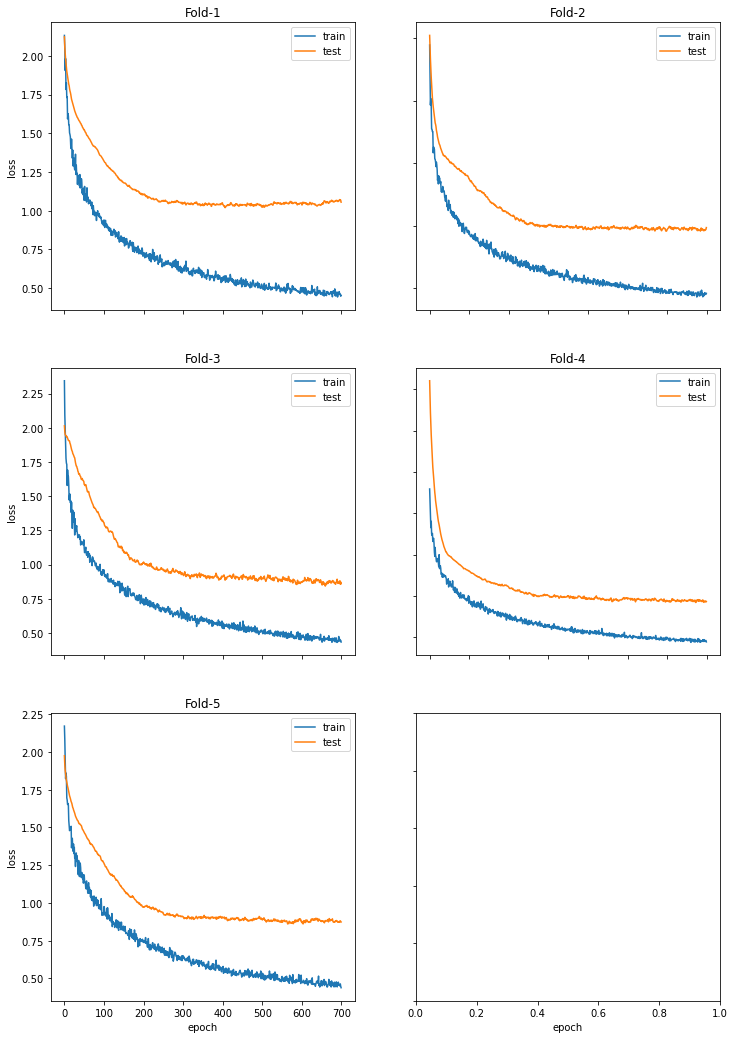

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2,figsize=(12,18))
axs[0, 0].plot(hist[0].history['loss'])
axs[0, 0].plot(hist[0].history['val_loss'])
axs[0, 0].set_title('Fold-1')
axs[0, 0].legend(['train', 'test'], loc='upper right')

axs[0, 1].plot(hist[1].history['loss'])
axs[0, 1].plot(hist[1].history['val_loss'])
axs[0, 1].set_title('Fold-2')
axs[0, 1].legend(['train', 'test'], loc='upper right')

axs[1, 0].plot(hist[2].history['loss'])
axs[1, 0].plot(hist[2].history['val_loss'])
axs[1, 0].set_title('Fold-3')
axs[1, 0].legend(['train', 'test'], loc='upper right')

axs[1, 1].plot(hist[3].history['loss'])
axs[1, 1].plot(hist[3].history['val_loss'])
axs[1, 1].set_title('Fold-4')
axs[1, 1].legend(['train', 'test'], loc='upper right')

axs[2, 0].plot(hist[4].history['loss'])
axs[2, 0].plot(hist[4].history['val_loss'])
axs[2, 0].set_title('Fold-5')
axs[2, 0].legend(['train', 'test'], loc='upper right')

#axs[2, 1].plot(hist[0].history['loss'])
#axs[2, 1].plot(hist[0].history['val_loss'])
#axs[2, 1].set_title('model loss')
#axs[2, 1].legend(['train', 'test'], loc='upper right')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.savefig('EmodbMale_5Folds_65.png')

In [ ]:
### Model yükleme, gereksizse yapma

In [ ]:
# loading json and creating model
from keras.models import model_from_json
savedir='Emodb_Model65Male/'
m='Malemodel1' # Infact female

json_file = open(savedir+m+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(savedir+m+'.h5')
print("Loaded model from disk")

Loaded model from disk


In [ ]:
import numpy as np
import tensorflow as tf
opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00001, decay=1e-6)

Xloaded=np.load(savedir+'/X1.npy')
yloaded=np.load(savedir+'/y1.npy')
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(Xloaded, yloaded, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 78.26%


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

y_pred = loaded_model.predict(Xloaded)
print(y_pred.shape)
yy = []
ya = []
for j in y_pred:
    yy.append(np.argmax(j))
print(len(yy))

##önemli
for j in yloaded:
    ya.append(np.argmax(j))

cm=confusion_matrix(ya, yy)
cm

2/2 [==============================] - 0s 10ms/step
(46, 7)
46


array([[11,  0,  0,  0,  0,  1,  0],
       [ 0,  2,  3,  0,  2,  0,  0],
       [ 0,  1,  5,  1,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  6,  1,  0],
       [ 1,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  6]], dtype=int64)

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = np.array(confusion_matrix(ya, yy) , dtype=float)
for it in range(0, 7):
    sumik = np.sum(array[it])
    for it2 in range(0, 7):
        array[it][it2] = round(array[it][it2] * (100.0/sumik) ,1)
print(array)

[[ 91.7   0.    0.    0.    0.    8.3   0. ]
 [  0.   28.6  42.9   0.   28.6   0.    0. ]
 [  0.   14.3  71.4  14.3   0.    0.    0. ]
 [  0.    0.    0.  100.    0.    0.    0. ]
 [  0.    0.    0.    0.   85.7  14.3   0. ]
 [ 20.    0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.    0.    0.    0.  100. ]]


         angry  bored  neutral  disgust  fear  happy    sad
angry     91.7    0.0      0.0      0.0   0.0    8.3    0.0
bored      0.0   28.6     42.9      0.0  28.6    0.0    0.0
neutral    0.0   14.3     71.4     14.3   0.0    0.0    0.0
disgust    0.0    0.0      0.0    100.0   0.0    0.0    0.0
fear       0.0    0.0      0.0      0.0  85.7   14.3    0.0
happy     20.0    0.0      0.0      0.0   0.0   80.0    0.0
sad        0.0    0.0      0.0      0.0   0.0    0.0  100.0



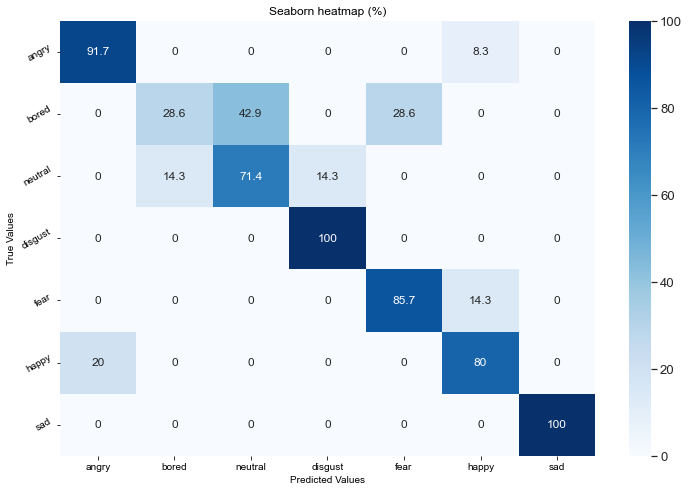

In [ ]:
## EMODB emotions : ['angry', 'bored', 'neutral', 'disgust', 'fear', 'happy', 'sad']

listik = ['angry', 'bored', 'neutral', 'disgust', 'fear', 'happy', 'sad']

df_cm1 = pd.DataFrame(array, index = [i for i in listik],
                  columns = [i for i in listik])
print(df_cm1)
print()
plt.figure(figsize = (12,8))
plt.title('Seaborn heatmap (%)')
sn.set(font_scale=1.2)
aa=sn.heatmap(df_cm1, annot=True, cmap="Blues", fmt='g', annot_kws={"size": 12})
aa.set_yticklabels(df_cm1,rotation=30)
aa.set_ylabel('True Values')
aa.set_xlabel('Predicted Values')
plt.savefig('EmodbMale_65.png')
plt.show()